Team rankings:
Rank 1: TeamA with rating 2.75
Rank 2: TeamB with rating 2.65
Rank 3: TeamD with rating 2.60
Rank 4: TeamE with rating 2.26
Rank 5: TeamC with rating 2.24


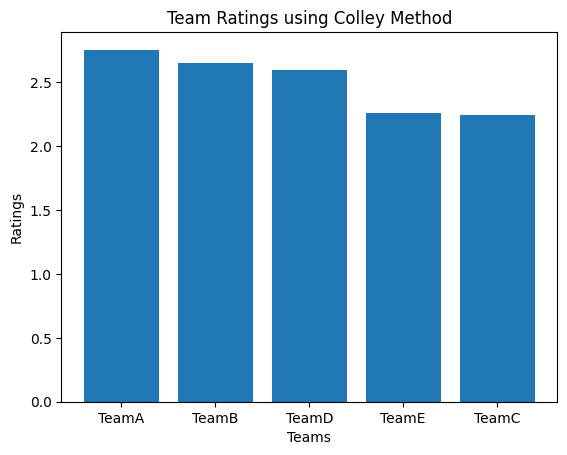

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_games(teams, n_games=20):
    """
    Randomly generate game outcomes for teams.
    Returns a list of tuples: (team_a, team_b, result)
    """
    games = []
    for _ in range(n_games):
        team_a, team_b = np.random.choice(teams, 2, replace=False)
        result = 'win' if np.random.rand() < 0.5 else 'lose'
        games.append((team_a, team_b, result))
    return games

def read_games_from_csv(filename):
    """Read games data from CSV and return as list of tuples."""
    df = pd.read_csv(filename)
    return list(df.itertuples(index=False, name=None))

# Custom team names
teams = ["TeamA", "TeamB", "TeamC", "TeamD", "TeamE"]

# Number of teams
n = len(teams)

# Get games (either generate or read from CSV)
# To generate games: games = generate_games(teams, n_games=20)
# To read from CSV: games = read_games_from_csv('games.csv')

games = generate_games(teams, n_games=20)
# games = read_games_from_csv('gamesample.csv')

# Initialize the matrix and vector
C = 2 * np.eye(n)
b = np.ones(n)

# Update the matrix C and b based on the games
for game in games:
    i, j, result = teams.index(game[0]), teams.index(game[1]), game[2]
    C[i, i] += 1
    C[j, j] += 1
    C[i, j] -= 1
    C[j, i] -= 1

    if result == 'win':
        b[i] += 1
    else:
        b[j] += 1

# Solve for ratings
r = np.linalg.solve(C, b)

# Rank teams
ranked_teams_indices = np.argsort(r)[::-1]

# Display results
print("Team rankings:")
for rank, idx in enumerate(ranked_teams_indices, 1):
    print(f"Rank {rank}: {teams[idx]} with rating {r[idx]:.2f}")

# Visualize
plt.bar(range(n), r[ranked_teams_indices], tick_label=[teams[i] for i in ranked_teams_indices])
plt.xlabel('Teams')
plt.ylabel('Ratings')
plt.title('Team Ratings using Colley Method')
plt.show()
